## EEG power spectral density

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
Necessary libraries
</div>

In [3]:
import mne
import matplotlib.pyplot as plt 
from scipy.signal import detrend
import os
import pandas as pd  



""""
# Install the `mne` library, which is useful for processing and analyzing neuroscience data
pip install mne

# Install the `matplotlib` library, which provides tools for creating graphs and visualizations
pip install matplotlib

# Install the `scipy` library, which offers functions and algorithms for scientific and technical computing
pip install scipy

# Install the `pandas` library, which is ideal for manipulating and analyzing data in tabular structures
pip install pandas

""""

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
What is its use in EEG studies?
</div>

<div style="text-align: justify;">
<span style="color: #b1c5fc;">Power Spectral Density (PSD)</span> is crucial for decomposing and analyzing signals in terms of their <span style="color: #b1c5fc;">frequency</span> components, allowing us to identify how power is distributed across <span style="color: #b1c5fc;">different frequency bands</span>. In EEG, PSD helps detect patterns of brain activity associated with cognitive and emotional states, diagnose and monitor neurological conditions, and develop biomarkers for clinical and research studies. It is also useful for detecting anomalies, designing filters to clean signals, and understanding the relationship between behavior and brain activity.
</div>


<div style="text-align: left;">
<img src="assets\PSD_image.png">
</div>
<br>

<div style="text-align: justify;">
In the previous graph we can see the frequency behavior of a correctly filtered and processed EEG signal.
</div>

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
The first thing is to load our EEG signal</div>

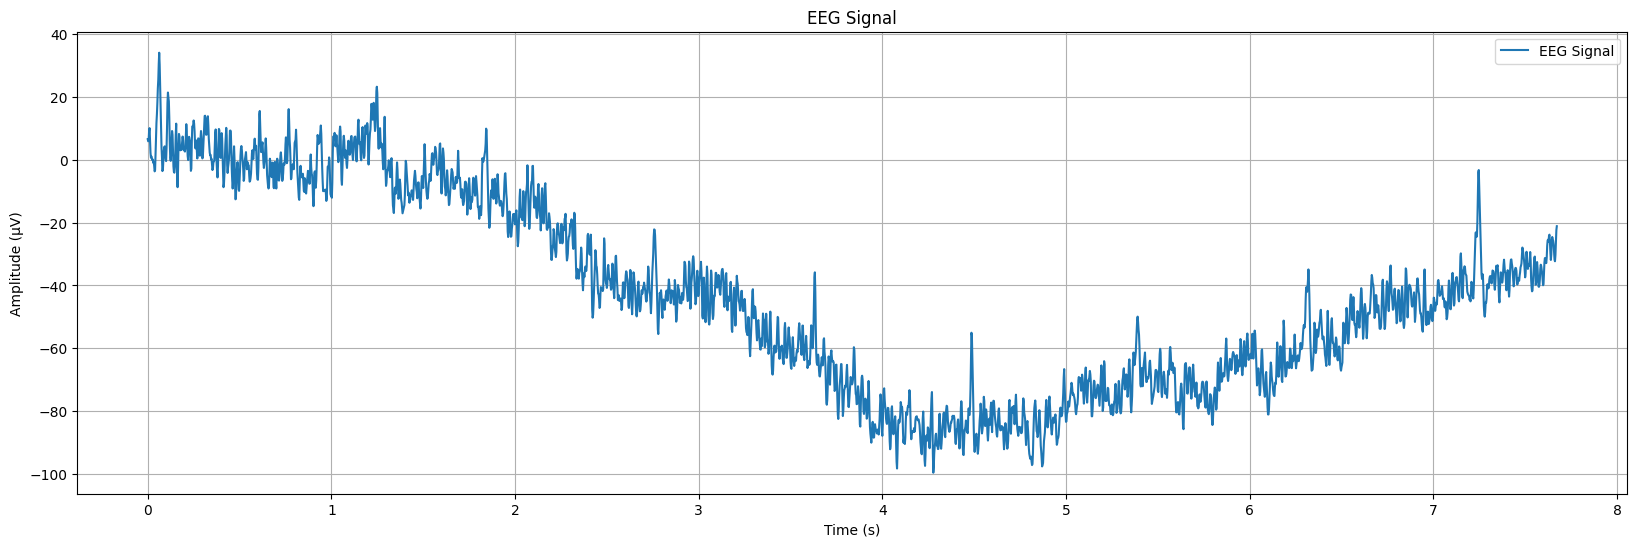

In [10]:
# Ruta al archivo CSV
csv_file_path = 'database/eeg_signal_data.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_file_path)

# Extraer las columnas de interés
times = df['Time (s)']
data_volts = df['Amplitude (µV)']

# Create the plot
plt.figure(figsize=(20, 6))                         # Set the figure size
plt.plot(times, data_volts, label='EEG Signal')     # Plot the EEG signal with a label
plt.xlabel('Time (s)')                              # Label for the x-axis
plt.ylabel('Amplitude (µV)')                        # Label for the y-axis
plt.title('EEG Signal')                             # Title of the plot
plt.legend()                                        # Display the legend
plt.grid(True)                                      # Add a grid for better readability

# Show the plot
plt.show()


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Compute the Power Spectral Density (PSD) using Welch's method</div>

 <span style="color: #b1c5fc;">psd = signal.welch(data_volts, fs=sampling_rate, nperseg=1024)</span> calculates the Power Spectral Density (PSD) of the signal data_volts using Welch's method. Welch's method divides the signal into overlapping segments, computes the periodogram for each segment, and averages these periodograms to provide a more accurate estimate of the PSD. The fs parameter specifies the sampling frequency of the signal, which is necessary for converting the time-domain data into frequency-domain information. The nperseg parameter defines the length of each segment used in the calculation. The function returns two arrays: frequencies, which represents the frequency bins, and psd, which represents the power of the signal at each frequency bin. This helps in analyzing how the power of the signal is distributed across different frequencies.

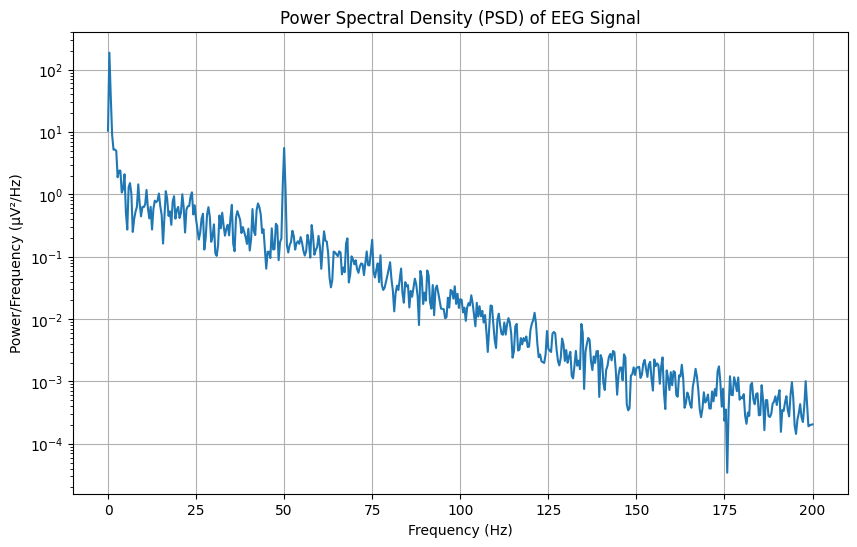

<Figure size 640x480 with 0 Axes>

In [15]:
times = df['Time (s)'].to_numpy()                    # Convert the 'Time (s)' column to a numpy array
data_volts = df['Amplitude (µV)'].to_numpy()         # Convert the 'Amplitude (µV)' column to a numpy array

# Assuming the time vector is uniformly spaced
sampling_rate = 1 / (times[1] - times[0])            # Compute the sampling rate

# Compute the Power Spectral Density (PSD) using Welch's method
frequencies, psd = signal.welch(data_volts, fs=sampling_rate, nperseg=1024)

# Create the plot for PSD
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)                      # Plot PSD on a logarithmic scale
plt.xlabel('Frequency (Hz)')                        # Label for the x-axis
plt.ylabel('Power/Frequency (µV²/Hz)')              # Label for the y-axis
plt.title('Power Spectral Density (PSD) of EEG Signal')  # Title of the plot
plt.grid(True)  # Add a grid for better readability

# Show the plot
plt.show()

# Save the plot as an image file
plt.savefig('assets/psd_plot.png', dpi=300)          # Save the plot as a PNG file with 300 DPI resolution



<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Raw PSD</div>

Finally, we obtain the raw PSD signal. However, it already exhibits the expected behavior. After being properly filtered, it will more closely resemble the initial image.